In [1]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import logomaker
import os

In [2]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/draw_weblogos")

In [3]:
WT_LRTable = pd.read_csv("../LshCas13a_C3000/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", sep="\t")
d10LVM_LRTable = pd.read_csv("../LshCas13a_d10LVM/Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", sep="\t")

WT_LRTable = WT_LRTable.query("logFC >= 4")
d10LVM_LRTable = d10LVM_LRTable.query("logFC >= 4")

WT_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)
d10LVM_LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)

T_RefSeqs = "../LshCas13a_C3000/Reference_sequences/Targeting_samples_refseqs.fasta"

In [4]:
def get_surroundings(seq, pos, left_side, right_side, strand):
    if strand == "+":
        seq_slice = seq[pos-left_side:pos+right_side].upper()
    elif strand == "-":
        seq_slice = seq[pos-right_side:pos+left_side].reverse_complement().upper()
    return(str(seq_slice.transcribe()))

In [5]:
N = 100
ls = 6
rs = 4

WT_topN = WT_LRTable.head(N)
d10LVM_topN = d10LVM_LRTable.head(N)

RefSeq_dict = {frecord.name : frecord.seq for frecord in SeqIO.parse(T_RefSeqs, "fasta")}

WT_seqs_list = list()
for i, row in WT_topN.iterrows():
    WT_seqs_list.append(get_surroundings(seq = RefSeq_dict[row["SeqID"]], 
                                         pos=row["Pos"]-1, 
                                         left_side=ls, 
                                         right_side=rs, 
                                         strand=row["Strand"]))

d10LVM_seqs_list = list()

for i, row in d10LVM_topN.iterrows():
    d10LVM_seqs_list.append(get_surroundings(seq = RefSeq_dict[row["SeqID"]], 
                                             pos=row["Pos"]-1, 
                                             left_side=ls, 
                                             right_side=rs, 
                                             strand=row["Strand"]))
    
WT_matrix = logomaker.alignment_to_matrix(sequences=WT_seqs_list, to_type="information")
d10LVM_matrix = logomaker.alignment_to_matrix(sequences=d10LVM_seqs_list, to_type="information")

/home/ledum/Soft/mambaforge/envs/ds/lib/python3.10/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T
/home/ledum/Soft/mambaforge/envs/ds/lib/python3.10/site-packages/logomaker/src/matrix.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  counts_df.loc[:, c] = tmp_mat.sum(axis=0).T


In [8]:
len(WT_topN)

90

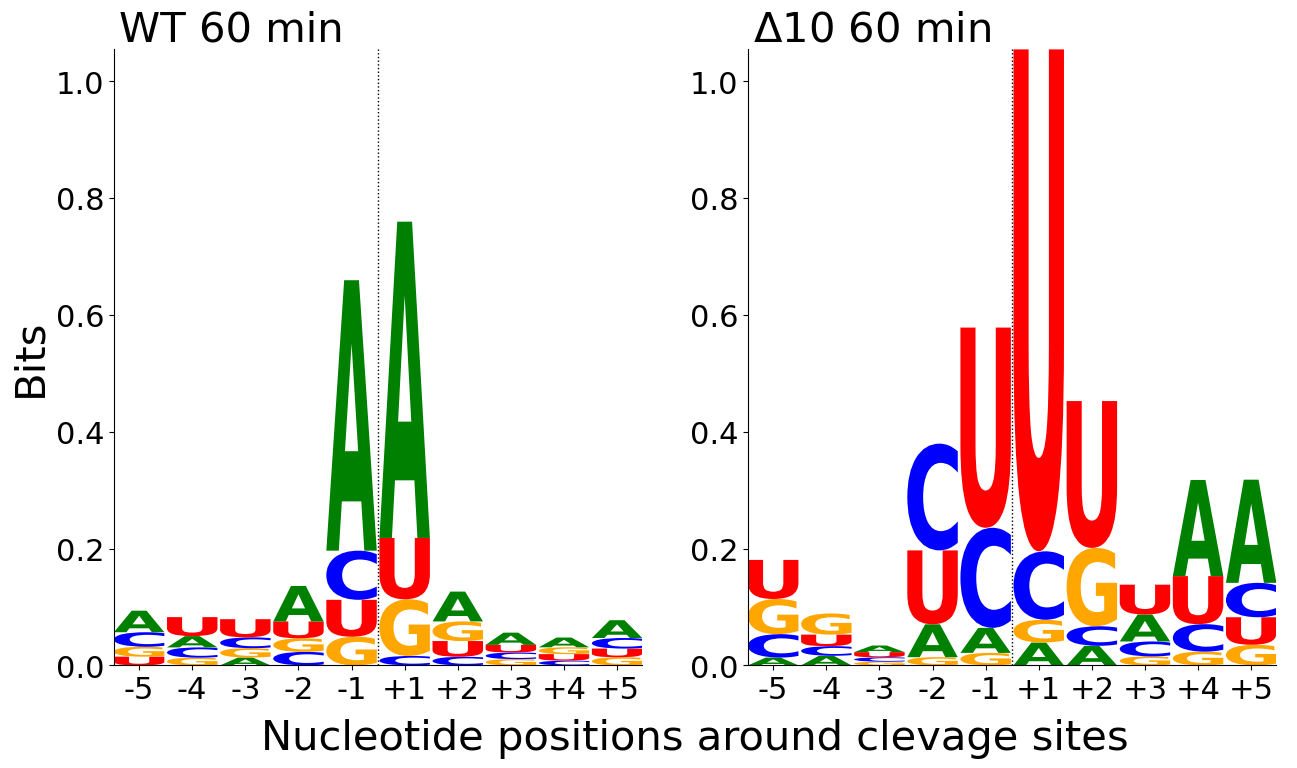

In [6]:
figure = plt.figure(figsize=(15,8))
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.2)

tszie = 30

xlabel = "Nucleotide positions around clevage sites"

xlabels = ["-%i" % i for i in range(ls-1, 0, -1)] + ["+%i" % i for i in range(1, rs+2, 1)]

WT_logo_subplot = figure.add_subplot(grid[0:1, 0:1])
d10LVM_logo_subplot = figure.add_subplot(grid[0:1, 1:2])

WT_logo = logomaker.Logo(WT_matrix, ax = WT_logo_subplot, stack_order="big_on_top")
WT_logo.ax.axvline(ls-1.5, color='black', linewidth=1, linestyle=':')

d10LVM_logo = logomaker.Logo(d10LVM_matrix, ax = d10LVM_logo_subplot,  stack_order="big_on_top")
d10LVM_logo.ax.axvline(ls-1.5, color='black', linewidth=1, linestyle=':')

ylims = (0, max(WT_logo_subplot.get_ylim() + d10LVM_logo_subplot.get_ylim()))

WT_logo_subplot.set_ylim(ylims)
WT_logo_subplot.set_xticks([i for i in range(len(xlabels))])
WT_logo_subplot.set_xticklabels(xlabels, size=30)
WT_logo_subplot.spines['top'].set_visible(False)
WT_logo_subplot.spines['right'].set_visible(False)
WT_logo_subplot.set_ylabel("Bits", size=30)
WT_logo_subplot.set_title("WT 60 min", size=30, 
                          position=(0.01, 0.95), horizontalalignment='left', 
                          transform=WT_logo_subplot.transAxes)
WT_logo_subplot.tick_params(axis='both', which='major', labelsize=22)

d10LVM_logo_subplot.set_ylim(ylims)
d10LVM_logo_subplot.set_xticks([i for i in range(len(xlabels))])
d10LVM_logo_subplot.set_xticklabels(xlabels, size=30)
d10LVM_logo_subplot.spines['top'].set_visible(False)
d10LVM_logo_subplot.spines['right'].set_visible(False)
#d10LVM_logo_subplot.set_ylabel("Bits", size=30)
d10LVM_logo_subplot.set_title("$\Delta$10 60 min", size=30, 
                              position=(0.01, 0.95), horizontalalignment='left', 
                              transform=d10LVM_logo_subplot.transAxes)
d10LVM_logo_subplot.tick_params(axis='both', which='both', labelsize=22)

invisible_subplot = figure.add_subplot(grid[0:1, 0:2], frameon=False)
invisible_subplot.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
invisible_subplot.set_xlabel(xlabel, size=30, labelpad=10)

from datetime import datetime
date = datetime.now().date()

date_suffix = "_%i_%i_%i" % (date.day, date.month, date.year)

figure.align_labels()

figure.savefig("Pictures/WT_d10_volcano.png", bbox_inches = "tight", dpi=200)